<a href="https://colab.research.google.com/github/Andbwol/Sber_lesson_3/blob/main/Sber_Bonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [287]:
import pandas as pd
import requests
import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [288]:
s=requests.get('https://iss.moex.com/iss/apps/infogrid/emission/rates.csv?iss.dp=comma&iss.df=%25d.%25m.%25Y&iss.tf=%25H:%25M:%25S&iss.dtf=%25d.%25m.%25Y%25H:%25M:%25S&iss.only=rates&limit=unlimited&lang=ru').content

In [289]:
df=pd.read_csv(io.StringIO(s.decode('cp1251')), sep=';',header=1)

In [290]:
df.shape

(2553, 55)

In [291]:
df.head()

,SECID,SHORTNAME,NAME,TYPENAME,ISIN,REGNUMBER,LISTLEVEL,FACEVALUE,FACEUNIT,ISSUESIZE,...,RTL3,RTH3,DISCOUNT1,LIMIT1,DISCOUNT2,LIMIT2,DISCOUNT3,DISCOUNTL0,DISCOUNTH0,FULLCOVERED
0,AMUNIBB2DER6,UBANK02/24,UNIBANK OJSC Series 1 21,Корпоративные еврооблигации,AMUNIBB2DER6,NaN,3.0,"100,0",USD,33478.0,...,"0,0","16540,42","100,0",NaN,NaN,NaN,NaN,"100,00000","100,00000",1.0
1,AT0000A2UF10,Raiff BIAG,Raiffeisen Bank Int AG,Корпоративные еврооблигации,AT0000A2UF10,NaN,3.0,"1000,0",USD,50000.0,...,"0,0","135867,94","100,0",NaN,NaN,NaN,NaN,"100,00000","100,00000",1.0
2,CH0248531110,VTB-24 CHF,VTB CAPITAL S.A. 24 CHF,Корпоративные еврооблигации,CH0248531110,NaN,NaN,"5000,0",CHF,70000.0,...,"0,0","961345,34","100,0",NaN,NaN,NaN,NaN,"100,00000","100,00000",1.0
3,CH0379268748,RZD-23 CHF,RZD Capital PLC 23 CHF,Корпоративные еврооблигации,CH0379268748,NaN,NaN,"5000,0",CHF,90000.0,...,"0,0","568645,02","100,0",NaN,NaN,NaN,NaN,"100,00000","100,00000",1.0
4,CH0419041618,RZD-25 CHF,RZD CAPITAL PLC 0.898 03/10/25,Корпоративные еврооблигации,CH0419041618,NaN,NaN,"5000,0",CHF,70000.0,...,"0,0","875424,0","100,0",NaN,NaN,NaN,NaN,"100,00000","100,00000",1.0


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SECID                   2553 non-null   object 
 1   SHORTNAME               2553 non-null   object 
 2   NAME                    2553 non-null   object 
 3   TYPENAME                2553 non-null   object 
 4   ISIN                    2553 non-null   object 
 5   REGNUMBER               2238 non-null   object 
 6   LISTLEVEL               2366 non-null   float64
 7   FACEVALUE               2553 non-null   object 
 8   FACEUNIT                2553 non-null   object 
 9   ISSUESIZE               2476 non-null   float64
 10  IS_COLLATERAL           2553 non-null   int64  
 11  IS_EXTERNAL             2553 non-null   int64  
 12  PRIMARY_BOARDID         2553 non-null   object 
 13  PRIMARY_BOARD_TITLE     2553 non-null   object 
 14  MATDATE                 2501 non-null   

In [293]:
df1 = df[['SHORTNAME', 'NAME', 'FACEVALUE', 'FACEUNIT','IS_QUALIFIED_INVESTORS','HIGH_RISK','COUPONDAYSPASSED','COUPONLENGTH', 'COUPONFREQUENCY','COUPONDATE', 'COUPONPERCENT', 'COUPONVALUE', 'OFFERDATE', 'EMITENTNAME', 'INN', 'PRICE', 'PRICE_RUB']]

In [294]:
df1.groupby('FACEUNIT').count()

,SHORTNAME,NAME,FACEVALUE,IS_QUALIFIED_INVESTORS,HIGH_RISK,COUPONDAYSPASSED,COUPONLENGTH,COUPONFREQUENCY,COUPONDATE,COUPONPERCENT,COUPONVALUE,OFFERDATE,EMITENTNAME,INN,PRICE,PRICE_RUB
FACEUNIT,,,,,,,,,,,,,,,,
CHF,7,7,7,7,7,7,7,7,7,6,7,0,7,7,7,7
CNY,28,28,28,28,28,28,28,22,28,28,28,5,28,28,28,28
EUR,39,39,39,39,39,39,39,37,39,32,33,0,39,39,37,37
GBP,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3
RUB,2194,2194,2194,2194,2194,2159,2187,1801,2187,2059,2059,359,2194,2194,2183,2183
USD,282,282,282,282,282,277,277,270,277,217,216,2,282,277,260,260


In [295]:
df1=df1[(df1.FACEUNIT=='RUB')]

In [300]:
df1.isna().sum()

SHORTNAME                    0
NAME                         0
FACEVALUE                    0
FACEUNIT                     0
IS_QUALIFIED_INVESTORS       0
HIGH_RISK                    0
COUPONDAYSPASSED            35
COUPONLENGTH                 7
COUPONFREQUENCY            393
COUPONDATE                   7
COUPONPERCENT              135
COUPONVALUE                135
OFFERDATE                 1835
EMITENTNAME                  0
INN                          0
PRICE                       11
PRICE_RUB                   11
dtype: int64

In [301]:
df1 = df1.dropna(subset=['COUPONPERCENT','PRICE','COUPONFREQUENCY','COUPONVALUE', 'COUPONDAYSPASSED'])

In [302]:
df1.isna().sum()

SHORTNAME                    0
NAME                         0
FACEVALUE                    0
FACEUNIT                     0
IS_QUALIFIED_INVESTORS       0
HIGH_RISK                    0
COUPONDAYSPASSED             0
COUPONLENGTH                 0
COUPONFREQUENCY              0
COUPONDATE                   0
COUPONPERCENT                0
COUPONVALUE                  0
OFFERDATE                 1347
EMITENTNAME                  0
INN                          0
PRICE                        0
PRICE_RUB                    0
dtype: int64

In [303]:
df1['COUPONPERCENT']=df1['COUPONPERCENT'].str.replace(',', '.').astype(float)

In [304]:
dist = []
K = range(2,11)

for k in K:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1[['COUPONPERCENT']])
    dist.append(kmeans.inertia_)
    print(k,kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

2 11449.675595716697
3 4212.758756324245
4 2473.167530978606
5 1410.4708184681872
6 998.9554167746096
7 756.4557464685422
8 614.4528141239855
9 477.9030254996344
10 371.54602845468276


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Inertia')

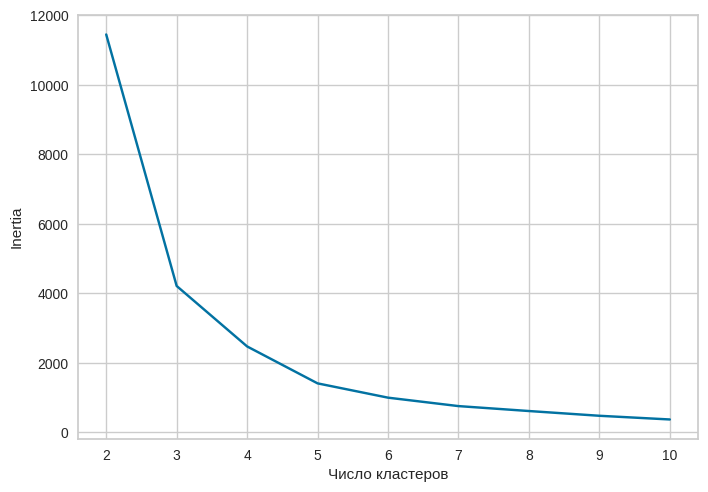

In [305]:
plt.plot(K, dist, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Inertia')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

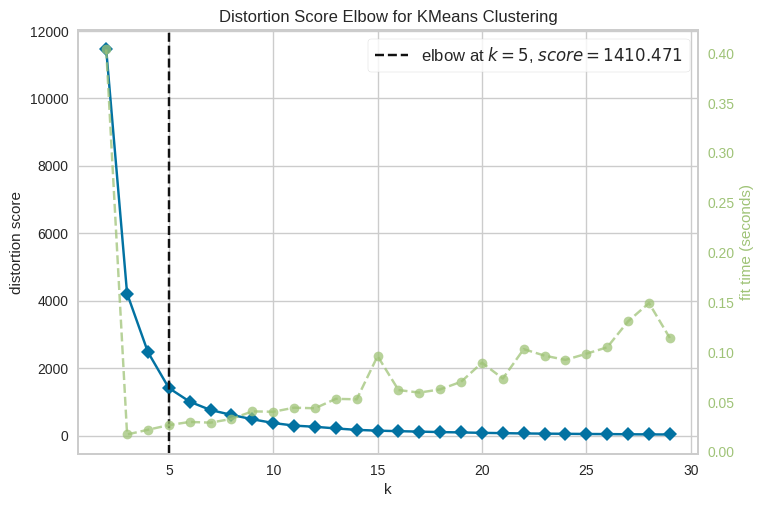

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [306]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df1[['COUPONPERCENT']])        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

Оптимально выделить 5 кластеров

In [307]:
kmeans = KMeans(n_clusters=5, random_state=42)
df1['Cluster']=kmeans.fit_predict(df1[['COUPONPERCENT']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [308]:
df2=df1[['COUPONPERCENT', 'Cluster']].groupby(['Cluster']).COUPONPERCENT.agg(count='count',mean='mean').sort_values(by='mean').reset_index()

In [309]:
df2

,Cluster,count,mean
0,0,280,0.238943
1,1,484,7.061287
2,3,597,9.468280
3,2,269,12.851948
4,4,59,17.965508


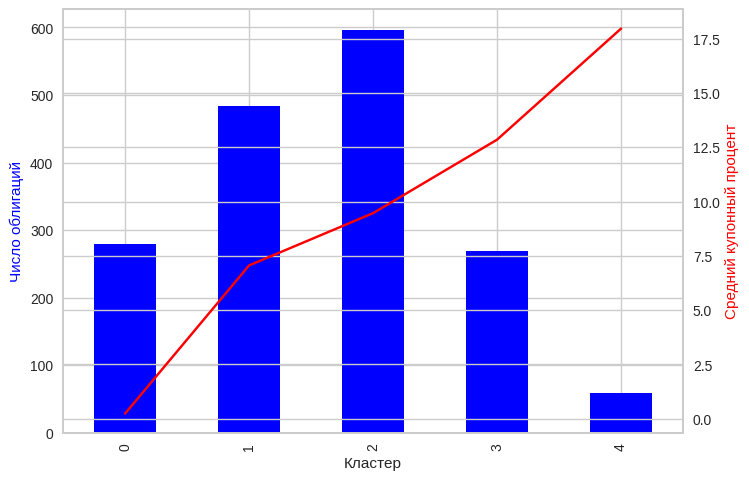

In [310]:
plt.xlabel('Кластер')
ax1 = df2['count'].plot(kind='bar', color='blue')
ax1.set_ylabel('Число облигаций',color="blue")
ax2 = ax1.twinx()
ax2 = df2['mean'].plot(color="red")
ax2.set_ylabel("Средний купонный процент",color="red")
plt.show()

Выбираем облигации с низким риском

In [311]:
df3=df1[(df1.HIGH_RISK==0)]

In [313]:
df3['FACEVALUE']=df3['FACEVALUE'].str.replace(',', '.').astype(float)
df3['COUPONVALUE']=df3['COUPONVALUE'].str.replace(',', '.').astype(float)
df3['PRICE_RUB']=df3['PRICE_RUB'].str.replace(',', '.').astype(float)

<ipython-input-313-07aa177adac6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['FACEVALUE']=df3['FACEVALUE'].str.replace(',', '.').astype(float)
<ipython-input-313-07aa177adac6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['COUPONVALUE']=df3['COUPONVALUE'].str.replace(',', '.').astype(float)
<ipython-input-313-07aa177adac6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [314]:
df3['COUPONAGE'] = df3['COUPONDAYSPASSED'] / df3['COUPONLENGTH']

<ipython-input-314-c572df33706d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['COUPONAGE'] = df3['COUPONDAYSPASSED'] / df3['COUPONLENGTH']


In [315]:
df4 = df3.loc[df3['COUPONAGE']<=0.2]

In [316]:
df4.reset_index(drop=True, inplace=True)

In [317]:
df4['NKD']= df4['FACEVALUE']*df4['COUPONAGE']*(df4['COUPONPERCENT']/df4['COUPONFREQUENCY'])

<ipython-input-317-aa820e427ede>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['NKD']= df4['FACEVALUE']*df4['COUPONAGE']*(df4['COUPONPERCENT']/df4['COUPONFREQUENCY'])


In [318]:
df4['Delta'] = df4['FACEVALUE'] - df4['PRICE_RUB']

<ipython-input-318-c613e2ef86e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Delta'] = df4['FACEVALUE'] - df4['PRICE_RUB']


In [319]:
df4['Delta']=df4['Delta']*df4['Delta'].apply(lambda x: 0.87 if x > 0 else 1)

<ipython-input-319-686eb6da476b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Delta']=df4['Delta']*df4['Delta'].apply(lambda x: 0.87 if x > 0 else 1)


In [320]:
df4['Profit']=((df4['Delta'] - df4['NKD'] + 0.87 * df4['COUPONVALUE'] * df4['COUPONFREQUENCY'])*100)/((df4['PRICE_RUB'] + df4['NKD'])*(1+0.06/100+0.0125/100))

<ipython-input-320-4690c211b983>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Profit']=((df4['Delta'] - df4['NKD'] + 0.87 * df4['COUPONVALUE'] * df4['COUPONFREQUENCY'])*100)/((df4['PRICE_RUB'] + df4['NKD'])*(1+0.06/100+0.0125/100))


In [321]:
df4['Profit']

0     -40.554712
1     -25.832703
2       8.172315
3       8.172315
4      -3.682503
         ...    
323    -4.173362
324    -5.290749
325   -30.947251
326   -26.853479
327   -16.676050
Name: Profit, Length: 328, dtype: float64

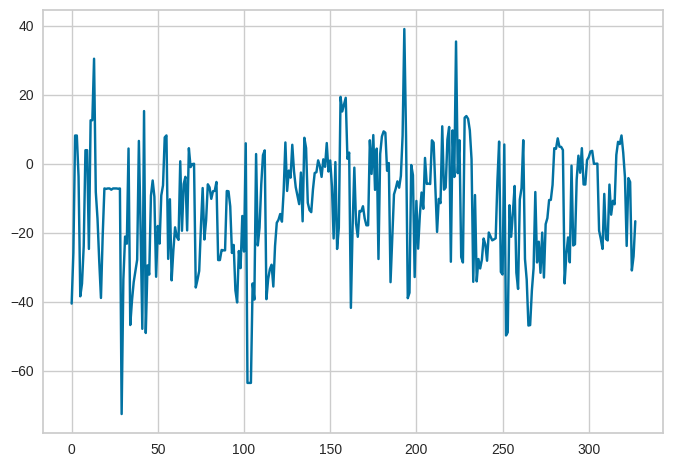

In [322]:
plt.plot(df4['Profit'], 'bx-')